In [1]:
# 1
import torch
from torch import nn,optim
from torch.autograd.variable import Variable
from torchvision import transforms,datasets
from utils import Logger
from IPython import display
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cd ..

/home/esmidth/github/CCS_TA_implement


In [3]:
# 5
class DiscriminatorNet(torch.nn.Module):
    """
    A three hidden-layer discriminative neural network
    """
    def __init__(self):
        super(DiscriminatorNet, self).__init__()
        n_features = 19*7
        n_out = 1
        
        self.hidden0 = nn.Sequential( 
            nn.Linear(n_features, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden1 = nn.Sequential(
            nn.Linear(1024,512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3)
        )
        self.out = nn.Sequential(
            torch.nn.Linear(256, n_out),
            torch.nn.Sigmoid()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

In [4]:
# 6
class GeneratorNet(torch.nn.Module):
    """
    A three hidden-layer generative neural network
    """
    def __init__(self):
        super(GeneratorNet, self).__init__()
        n_features = 100
        n_out = 19*7
        
        self.hidden0 = nn.Sequential(
            nn.Linear(n_features, 256),
            nn.LeakyReLU(0.2)
        )
        self.hidden1 = nn.Sequential(            
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2)
        )
        self.hidden2 = nn.Sequential(
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2)
        )
        
        self.out = nn.Sequential(
            nn.Linear(1024, n_out),
#             nn.Tanh()
        )

    def forward(self, x):
        x = self.hidden0(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
        x = self.out(x)
        return x

In [5]:
# 4
def noise(size):
    n = Variable(torch.randn(size, 100))
    if torch.cuda.is_available(): return n.cuda() 
    return n

In [6]:
generator = torch.load('2_generator.pkl')
discriminator = torch.load('2_discriminator_1.pkl')

In [12]:
g3 = model(noise(23)).detach().cpu().numpy()

In [7]:
import pickle
with open('tensor2.pkl','rb') as f:
    tensor_array = pickle.load(f)

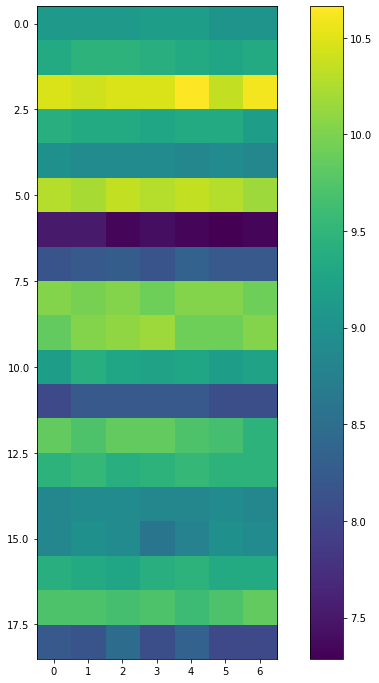

In [21]:
indi = 101
plt.figure(figsize=(12,12))
plt.imshow(tensor_array[indi])
plt.colorbar()
plt.savefig('7_st_show_{}.png'.format(indi),dpi=300,bbox_inches='tight',pad_inches=0)

In [15]:
mean_list = []
std_list = []
for item in tensor_array:
    mean_list.append(np.mean(item))
    std_list.append(np.std(item))

In [51]:
while True:
    g1 = generator(noise(1))
    loss = g1.cpu().detach().numpy().reshape(19,7) - tensor_array[10000]
    mre = np.sum(np.abs(loss))
    if mre < 40:
        print(mre)
        break
print(g1)
print(discriminator(g1))

38.224524854123594
tensor([[ 9.2546e-01,  8.0033e-01,  9.0518e-01,  6.5948e-01,  8.9737e-01,
          1.0353e+00,  9.1044e-01,  4.6967e-01,  4.5846e-01,  2.5418e-01,
          5.7640e-01,  6.3997e-01,  6.5834e-01,  3.2882e-01,  7.7912e-01,
          7.6499e-01,  8.5588e-01,  1.0958e+00,  6.1008e-01,  5.7305e-01,
          7.8942e-01,  5.9922e-01,  4.1190e-01,  2.9075e-01,  2.4153e-01,
          3.3904e-01,  4.5968e-01,  6.2735e-01,  2.4001e-01,  2.6937e-01,
          8.1701e-02,  2.8383e-02,  3.2067e-01,  2.1680e-01,  3.5819e-01,
          9.2876e-01,  1.0571e+00,  1.3236e+00,  1.0510e+00,  9.0397e-01,
          9.8041e-01,  8.5140e-01,  7.2902e-03, -2.3945e-01, -1.7842e-01,
         -3.3474e-01, -1.2667e-01, -2.0613e-01, -3.1208e-01,  4.3972e-01,
          3.9889e-01,  3.3605e-01,  4.0954e-01,  2.7753e-01,  5.1144e-01,
          5.5236e-01,  2.2274e+00,  2.1818e+00,  2.1023e+00,  2.2758e+00,
          2.2577e+00,  2.3459e+00,  2.0288e+00,  6.9451e-01,  8.3759e-01,
          7.3147e-0

In [48]:
tensor_array[10000]

array([[ 0.475,  0.6  ,  0.662,  0.6  ,  0.787,  0.662,  0.662],
       [ 0.412,  0.475,  0.662,  0.537,  0.6  ,  0.662,  0.662],
       [ 0.163,  0.037,  0.1  ,  0.037,  0.225,  0.037,  0.225],
       [ 0.475,  0.412,  0.6  ,  0.475,  0.475,  0.412,  0.35 ],
       [ 0.787,  0.725,  0.537,  0.662,  0.6  ,  0.537,  0.662],
       [ 0.225,  0.1  ,  0.1  , -0.087, -0.087,  0.1  , -0.087],
       [-0.025, -0.025, -0.025, -0.212, -0.338, -0.025, -0.275],
       [-0.588, -0.65 , -0.713, -0.525, -0.525, -0.525, -0.525],
       [ 2.1  ,  2.1  ,  2.163,  2.225,  2.225,  2.163,  2.1  ],
       [ 1.038,  0.85 ,  0.975,  0.912,  0.912,  0.912,  0.912],
       [ 0.225,  0.412,  0.412,  0.163,  0.537,  0.475,  0.412],
       [ 0.037,  0.037,  0.1  ,  0.1  ,  0.037, -0.087,  0.037],
       [ 0.662,  0.537,  0.725,  0.475,  0.662,  0.412,  0.475],
       [ 0.975,  0.85 ,  0.787,  0.725,  0.725,  0.85 ,  0.787],
       [ 0.163,  0.287,  0.287,  0.163,  0.287,  0.35 ,  0.412],
       [ 0.787,  0.787,  

In [28]:
loss = g1.cpu().detach().numpy().reshape(19,7) - tensor_array[10000]
print(loss)

[[ 0.45370867  0.08187976  0.290793    0.14501634  0.04818094  0.41257578
   0.27742082]
 [-0.04766309 -0.23051516 -0.46562719 -0.09789303 -0.09290347 -0.24839476
  -0.45185132]
 [ 0.54144417  0.72355932  0.67652955  1.065736    0.34359905  0.49586076
   0.5510092 ]
 [ 0.25655552 -0.00728875 -0.2829612  -0.21632484  0.03340509  0.17504406
   0.38445714]
 [-0.45300478 -0.34093631 -0.37091184 -0.61880898 -0.16992686 -0.0950976
  -0.16966   ]
 [ 0.75390902  0.78661349  0.95967975  1.02645408  0.85280101  0.92427864
   0.79780196]
 [ 0.02978369 -0.19178753 -0.03731692 -0.01946628  0.10627157 -0.12461028
   0.03082173]
 [ 0.70138493  0.79334044  0.86493936  0.74136321  0.64518128  0.75523243
   0.82914435]
 [ 0.07517471  0.12424173 -0.12930764  0.01280823 -0.01226578  0.09172403
  -0.08378706]
 [-0.14920534  0.06694015 -0.18291799  0.05109388  0.07367015 -0.01499218
  -0.00723773]
 [ 0.15597438 -0.10090667 -0.07149902  0.25674035 -0.12921506 -0.12942741
  -0.17611398]
 [-0.30908588 -0.18436

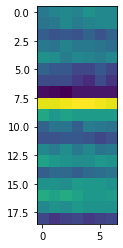

In [32]:
plt.imshow(tensor_array[10000])

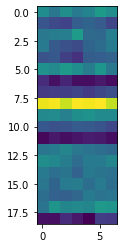

In [30]:
plt.imshow(g1.cpu().detach().numpy().reshape(19,7))

# benchmark

In [8]:
def generate_missing_matrix(data_matrix,miss_ratio=0.1):
    origin  = data_matrix.copy()
    spatial_size = data_matrix.shape[0]
    temporal_size = data_matrix.shape[1]
    k = round(spatial_size*temporal_size*miss_ratio)
    mask = np.ones_like(data_matrix)
    ri = np.random.choice(spatial_size*temporal_size,k,replace=False)
    origin.flat[ri] = 0
    mask.flat[ri] = 0
    return origin,mask
data_matrix,mask =generate_missing_matrix(tensor_array[0],0.3)

In [9]:
def reconstruction(data_matrix,mask):
    while True:
        g1 = generator(noise(1))
        loss = g1.cpu().detach().numpy().reshape(19,7) - tensor_array[10000]
        mre = np.sum(np.abs(loss))
        if mre < 40:
            print(mre)
            break
    print(g1)
    print(discriminator(g1))

In [30]:
g1 = generator(noise(1))
np.sum(np.abs(g1.detach().cpu().numpy().reshape(19,7)*mask - data_matrix*mask))

566.9842818746567

In [47]:
np.sum(np.abs(g1.detach().cpu().numpy().reshape(19,7)*mask - data_matrix))

843.6712454521655

In [45]:
np.sum(np.abs(g1.detach().cpu().numpy().reshape(19,7)-data_matrix))

886.3079108262061

In [9]:
def reconstruction(data_matrix,mask):
    g1 = generator(noise(200000))
    g1_c = g1.cpu().detach().numpy().reshape(200000,19,7)
    min_mre = 10000
    re_data_matrix = data_matrix
    for j in g1_c:
        loss = j*mask - data_matrix
        mre = np.sum(np.abs(loss))
        if mre < min_mre:
            min_mre = mre
            re_data_matrix = j
#     print(min_mre)
    del g1
    return re_data_matrix
        

In [61]:
def reconstruction(data_matrix,mask):
    while True:
        g1 = generator(noise(1))
        g1_c = g1.cpu().detach().numpy().reshape(1,19,7)
        loss = g1_c*mask - data_matrix
        mre = np.sum(np.abs(loss))
        if mre < 60:
            break
#             min_mre = mre
#             re_data_matrix = j
#     print(min_mre)
    return g1_c

In [10]:
dcs_loss_total = []
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    dcs_loss = []
    j = 0
    for tensor in tensor_array[:500]:
        data_matrix,mask =generate_missing_matrix(tensor,i)
        re_data = reconstruction(data_matrix,mask)
        dcs_loss.append(np.sum(np.abs(re_data-tensor)))
        print('miss_ratio:{}, i:{}'.format(i,j))
        j += 1
    dcs_loss_total.append(dcs_loss)
#     print(re_data)
#     print(tensor_array[1])
#     print(tensor_array[0])
#     print(data_matrix)

miss_ratio:0.1, i:0
miss_ratio:0.1, i:1
miss_ratio:0.1, i:2
miss_ratio:0.1, i:3
miss_ratio:0.1, i:4
miss_ratio:0.1, i:5
miss_ratio:0.1, i:6
miss_ratio:0.1, i:7
miss_ratio:0.1, i:8
miss_ratio:0.1, i:9
miss_ratio:0.1, i:10
miss_ratio:0.1, i:11
miss_ratio:0.1, i:12
miss_ratio:0.1, i:13
miss_ratio:0.1, i:14
miss_ratio:0.1, i:15
miss_ratio:0.1, i:16
miss_ratio:0.1, i:17
miss_ratio:0.1, i:18
miss_ratio:0.1, i:19
miss_ratio:0.1, i:20
miss_ratio:0.1, i:21
miss_ratio:0.1, i:22
miss_ratio:0.1, i:23
miss_ratio:0.1, i:24
miss_ratio:0.1, i:25
miss_ratio:0.1, i:26
miss_ratio:0.1, i:27
miss_ratio:0.1, i:28
miss_ratio:0.1, i:29
miss_ratio:0.1, i:30
miss_ratio:0.1, i:31
miss_ratio:0.1, i:32
miss_ratio:0.1, i:33
miss_ratio:0.1, i:34
miss_ratio:0.1, i:35
miss_ratio:0.1, i:36
miss_ratio:0.1, i:37
miss_ratio:0.1, i:38
miss_ratio:0.1, i:39
miss_ratio:0.1, i:40
miss_ratio:0.1, i:41
miss_ratio:0.1, i:42
miss_ratio:0.1, i:43
miss_ratio:0.1, i:44
miss_ratio:0.1, i:45
miss_ratio:0.1, i:46
miss_ratio:0.1, i:47
mi

miss_ratio:0.1, i:378
miss_ratio:0.1, i:379
miss_ratio:0.1, i:380
miss_ratio:0.1, i:381
miss_ratio:0.1, i:382
miss_ratio:0.1, i:383
miss_ratio:0.1, i:384
miss_ratio:0.1, i:385
miss_ratio:0.1, i:386
miss_ratio:0.1, i:387
miss_ratio:0.1, i:388
miss_ratio:0.1, i:389
miss_ratio:0.1, i:390
miss_ratio:0.1, i:391
miss_ratio:0.1, i:392
miss_ratio:0.1, i:393
miss_ratio:0.1, i:394
miss_ratio:0.1, i:395
miss_ratio:0.1, i:396
miss_ratio:0.1, i:397
miss_ratio:0.1, i:398
miss_ratio:0.1, i:399
miss_ratio:0.1, i:400
miss_ratio:0.1, i:401
miss_ratio:0.1, i:402
miss_ratio:0.1, i:403
miss_ratio:0.1, i:404
miss_ratio:0.1, i:405
miss_ratio:0.1, i:406
miss_ratio:0.1, i:407
miss_ratio:0.1, i:408
miss_ratio:0.1, i:409
miss_ratio:0.1, i:410
miss_ratio:0.1, i:411
miss_ratio:0.1, i:412
miss_ratio:0.1, i:413
miss_ratio:0.1, i:414
miss_ratio:0.1, i:415
miss_ratio:0.1, i:416
miss_ratio:0.1, i:417
miss_ratio:0.1, i:418
miss_ratio:0.1, i:419
miss_ratio:0.1, i:420
miss_ratio:0.1, i:421
miss_ratio:0.1, i:422
miss_ratio

miss_ratio:0.2, i:256
miss_ratio:0.2, i:257
miss_ratio:0.2, i:258
miss_ratio:0.2, i:259
miss_ratio:0.2, i:260
miss_ratio:0.2, i:261
miss_ratio:0.2, i:262
miss_ratio:0.2, i:263
miss_ratio:0.2, i:264
miss_ratio:0.2, i:265
miss_ratio:0.2, i:266
miss_ratio:0.2, i:267
miss_ratio:0.2, i:268
miss_ratio:0.2, i:269
miss_ratio:0.2, i:270
miss_ratio:0.2, i:271
miss_ratio:0.2, i:272
miss_ratio:0.2, i:273
miss_ratio:0.2, i:274
miss_ratio:0.2, i:275
miss_ratio:0.2, i:276
miss_ratio:0.2, i:277
miss_ratio:0.2, i:278
miss_ratio:0.2, i:279
miss_ratio:0.2, i:280
miss_ratio:0.2, i:281
miss_ratio:0.2, i:282
miss_ratio:0.2, i:283
miss_ratio:0.2, i:284
miss_ratio:0.2, i:285
miss_ratio:0.2, i:286
miss_ratio:0.2, i:287
miss_ratio:0.2, i:288
miss_ratio:0.2, i:289
miss_ratio:0.2, i:290
miss_ratio:0.2, i:291
miss_ratio:0.2, i:292
miss_ratio:0.2, i:293
miss_ratio:0.2, i:294
miss_ratio:0.2, i:295
miss_ratio:0.2, i:296
miss_ratio:0.2, i:297
miss_ratio:0.2, i:298
miss_ratio:0.2, i:299
miss_ratio:0.2, i:300
miss_ratio

miss_ratio:0.3, i:134
miss_ratio:0.3, i:135
miss_ratio:0.3, i:136
miss_ratio:0.3, i:137
miss_ratio:0.3, i:138
miss_ratio:0.3, i:139
miss_ratio:0.3, i:140
miss_ratio:0.3, i:141
miss_ratio:0.3, i:142
miss_ratio:0.3, i:143
miss_ratio:0.3, i:144
miss_ratio:0.3, i:145
miss_ratio:0.3, i:146
miss_ratio:0.3, i:147
miss_ratio:0.3, i:148
miss_ratio:0.3, i:149
miss_ratio:0.3, i:150
miss_ratio:0.3, i:151
miss_ratio:0.3, i:152
miss_ratio:0.3, i:153
miss_ratio:0.3, i:154
miss_ratio:0.3, i:155
miss_ratio:0.3, i:156
miss_ratio:0.3, i:157
miss_ratio:0.3, i:158
miss_ratio:0.3, i:159
miss_ratio:0.3, i:160
miss_ratio:0.3, i:161
miss_ratio:0.3, i:162
miss_ratio:0.3, i:163
miss_ratio:0.3, i:164
miss_ratio:0.3, i:165
miss_ratio:0.3, i:166
miss_ratio:0.3, i:167
miss_ratio:0.3, i:168
miss_ratio:0.3, i:169
miss_ratio:0.3, i:170
miss_ratio:0.3, i:171
miss_ratio:0.3, i:172
miss_ratio:0.3, i:173
miss_ratio:0.3, i:174
miss_ratio:0.3, i:175
miss_ratio:0.3, i:176
miss_ratio:0.3, i:177
miss_ratio:0.3, i:178
miss_ratio

miss_ratio:0.4, i:8
miss_ratio:0.4, i:9
miss_ratio:0.4, i:10
miss_ratio:0.4, i:11
miss_ratio:0.4, i:12
miss_ratio:0.4, i:13
miss_ratio:0.4, i:14
miss_ratio:0.4, i:15
miss_ratio:0.4, i:16
miss_ratio:0.4, i:17
miss_ratio:0.4, i:18
miss_ratio:0.4, i:19
miss_ratio:0.4, i:20
miss_ratio:0.4, i:21
miss_ratio:0.4, i:22
miss_ratio:0.4, i:23
miss_ratio:0.4, i:24
miss_ratio:0.4, i:25
miss_ratio:0.4, i:26
miss_ratio:0.4, i:27
miss_ratio:0.4, i:28
miss_ratio:0.4, i:29
miss_ratio:0.4, i:30
miss_ratio:0.4, i:31
miss_ratio:0.4, i:32
miss_ratio:0.4, i:33
miss_ratio:0.4, i:34
miss_ratio:0.4, i:35
miss_ratio:0.4, i:36
miss_ratio:0.4, i:37
miss_ratio:0.4, i:38
miss_ratio:0.4, i:39
miss_ratio:0.4, i:40
miss_ratio:0.4, i:41
miss_ratio:0.4, i:42
miss_ratio:0.4, i:43
miss_ratio:0.4, i:44
miss_ratio:0.4, i:45
miss_ratio:0.4, i:46
miss_ratio:0.4, i:47
miss_ratio:0.4, i:48
miss_ratio:0.4, i:49
miss_ratio:0.4, i:50
miss_ratio:0.4, i:51
miss_ratio:0.4, i:52
miss_ratio:0.4, i:53
miss_ratio:0.4, i:54
miss_ratio:0.4,

miss_ratio:0.4, i:385
miss_ratio:0.4, i:386
miss_ratio:0.4, i:387
miss_ratio:0.4, i:388
miss_ratio:0.4, i:389
miss_ratio:0.4, i:390
miss_ratio:0.4, i:391
miss_ratio:0.4, i:392
miss_ratio:0.4, i:393
miss_ratio:0.4, i:394
miss_ratio:0.4, i:395
miss_ratio:0.4, i:396
miss_ratio:0.4, i:397
miss_ratio:0.4, i:398
miss_ratio:0.4, i:399
miss_ratio:0.4, i:400
miss_ratio:0.4, i:401
miss_ratio:0.4, i:402
miss_ratio:0.4, i:403
miss_ratio:0.4, i:404
miss_ratio:0.4, i:405
miss_ratio:0.4, i:406
miss_ratio:0.4, i:407
miss_ratio:0.4, i:408
miss_ratio:0.4, i:409
miss_ratio:0.4, i:410
miss_ratio:0.4, i:411
miss_ratio:0.4, i:412
miss_ratio:0.4, i:413
miss_ratio:0.4, i:414
miss_ratio:0.4, i:415
miss_ratio:0.4, i:416
miss_ratio:0.4, i:417
miss_ratio:0.4, i:418
miss_ratio:0.4, i:419
miss_ratio:0.4, i:420
miss_ratio:0.4, i:421
miss_ratio:0.4, i:422
miss_ratio:0.4, i:423
miss_ratio:0.4, i:424
miss_ratio:0.4, i:425
miss_ratio:0.4, i:426
miss_ratio:0.4, i:427
miss_ratio:0.4, i:428
miss_ratio:0.4, i:429
miss_ratio

miss_ratio:0.5, i:263
miss_ratio:0.5, i:264
miss_ratio:0.5, i:265
miss_ratio:0.5, i:266
miss_ratio:0.5, i:267
miss_ratio:0.5, i:268
miss_ratio:0.5, i:269
miss_ratio:0.5, i:270
miss_ratio:0.5, i:271
miss_ratio:0.5, i:272
miss_ratio:0.5, i:273
miss_ratio:0.5, i:274
miss_ratio:0.5, i:275
miss_ratio:0.5, i:276
miss_ratio:0.5, i:277
miss_ratio:0.5, i:278
miss_ratio:0.5, i:279
miss_ratio:0.5, i:280
miss_ratio:0.5, i:281
miss_ratio:0.5, i:282
miss_ratio:0.5, i:283
miss_ratio:0.5, i:284
miss_ratio:0.5, i:285
miss_ratio:0.5, i:286
miss_ratio:0.5, i:287
miss_ratio:0.5, i:288
miss_ratio:0.5, i:289
miss_ratio:0.5, i:290
miss_ratio:0.5, i:291
miss_ratio:0.5, i:292
miss_ratio:0.5, i:293
miss_ratio:0.5, i:294
miss_ratio:0.5, i:295
miss_ratio:0.5, i:296
miss_ratio:0.5, i:297
miss_ratio:0.5, i:298
miss_ratio:0.5, i:299
miss_ratio:0.5, i:300
miss_ratio:0.5, i:301
miss_ratio:0.5, i:302
miss_ratio:0.5, i:303
miss_ratio:0.5, i:304
miss_ratio:0.5, i:305
miss_ratio:0.5, i:306
miss_ratio:0.5, i:307
miss_ratio

miss_ratio:0.6, i:141
miss_ratio:0.6, i:142
miss_ratio:0.6, i:143
miss_ratio:0.6, i:144
miss_ratio:0.6, i:145
miss_ratio:0.6, i:146
miss_ratio:0.6, i:147
miss_ratio:0.6, i:148
miss_ratio:0.6, i:149
miss_ratio:0.6, i:150
miss_ratio:0.6, i:151
miss_ratio:0.6, i:152
miss_ratio:0.6, i:153
miss_ratio:0.6, i:154
miss_ratio:0.6, i:155
miss_ratio:0.6, i:156
miss_ratio:0.6, i:157
miss_ratio:0.6, i:158
miss_ratio:0.6, i:159
miss_ratio:0.6, i:160
miss_ratio:0.6, i:161
miss_ratio:0.6, i:162
miss_ratio:0.6, i:163
miss_ratio:0.6, i:164
miss_ratio:0.6, i:165
miss_ratio:0.6, i:166
miss_ratio:0.6, i:167
miss_ratio:0.6, i:168
miss_ratio:0.6, i:169
miss_ratio:0.6, i:170
miss_ratio:0.6, i:171
miss_ratio:0.6, i:172
miss_ratio:0.6, i:173
miss_ratio:0.6, i:174
miss_ratio:0.6, i:175
miss_ratio:0.6, i:176
miss_ratio:0.6, i:177
miss_ratio:0.6, i:178
miss_ratio:0.6, i:179
miss_ratio:0.6, i:180
miss_ratio:0.6, i:181
miss_ratio:0.6, i:182
miss_ratio:0.6, i:183
miss_ratio:0.6, i:184
miss_ratio:0.6, i:185
miss_ratio

miss_ratio:0.7, i:15
miss_ratio:0.7, i:16
miss_ratio:0.7, i:17
miss_ratio:0.7, i:18
miss_ratio:0.7, i:19
miss_ratio:0.7, i:20
miss_ratio:0.7, i:21
miss_ratio:0.7, i:22
miss_ratio:0.7, i:23
miss_ratio:0.7, i:24
miss_ratio:0.7, i:25
miss_ratio:0.7, i:26
miss_ratio:0.7, i:27
miss_ratio:0.7, i:28
miss_ratio:0.7, i:29
miss_ratio:0.7, i:30
miss_ratio:0.7, i:31
miss_ratio:0.7, i:32
miss_ratio:0.7, i:33
miss_ratio:0.7, i:34
miss_ratio:0.7, i:35
miss_ratio:0.7, i:36
miss_ratio:0.7, i:37
miss_ratio:0.7, i:38
miss_ratio:0.7, i:39
miss_ratio:0.7, i:40
miss_ratio:0.7, i:41
miss_ratio:0.7, i:42
miss_ratio:0.7, i:43
miss_ratio:0.7, i:44
miss_ratio:0.7, i:45
miss_ratio:0.7, i:46
miss_ratio:0.7, i:47
miss_ratio:0.7, i:48
miss_ratio:0.7, i:49
miss_ratio:0.7, i:50
miss_ratio:0.7, i:51
miss_ratio:0.7, i:52
miss_ratio:0.7, i:53
miss_ratio:0.7, i:54
miss_ratio:0.7, i:55
miss_ratio:0.7, i:56
miss_ratio:0.7, i:57
miss_ratio:0.7, i:58
miss_ratio:0.7, i:59
miss_ratio:0.7, i:60
miss_ratio:0.7, i:61
miss_ratio:0.

miss_ratio:0.7, i:392
miss_ratio:0.7, i:393
miss_ratio:0.7, i:394
miss_ratio:0.7, i:395
miss_ratio:0.7, i:396
miss_ratio:0.7, i:397
miss_ratio:0.7, i:398
miss_ratio:0.7, i:399
miss_ratio:0.7, i:400
miss_ratio:0.7, i:401
miss_ratio:0.7, i:402
miss_ratio:0.7, i:403
miss_ratio:0.7, i:404
miss_ratio:0.7, i:405
miss_ratio:0.7, i:406
miss_ratio:0.7, i:407
miss_ratio:0.7, i:408
miss_ratio:0.7, i:409
miss_ratio:0.7, i:410
miss_ratio:0.7, i:411
miss_ratio:0.7, i:412
miss_ratio:0.7, i:413
miss_ratio:0.7, i:414
miss_ratio:0.7, i:415
miss_ratio:0.7, i:416
miss_ratio:0.7, i:417
miss_ratio:0.7, i:418
miss_ratio:0.7, i:419
miss_ratio:0.7, i:420
miss_ratio:0.7, i:421
miss_ratio:0.7, i:422
miss_ratio:0.7, i:423
miss_ratio:0.7, i:424
miss_ratio:0.7, i:425
miss_ratio:0.7, i:426
miss_ratio:0.7, i:427
miss_ratio:0.7, i:428
miss_ratio:0.7, i:429
miss_ratio:0.7, i:430
miss_ratio:0.7, i:431
miss_ratio:0.7, i:432
miss_ratio:0.7, i:433
miss_ratio:0.7, i:434
miss_ratio:0.7, i:435
miss_ratio:0.7, i:436
miss_ratio

miss_ratio:0.8, i:270
miss_ratio:0.8, i:271
miss_ratio:0.8, i:272
miss_ratio:0.8, i:273
miss_ratio:0.8, i:274
miss_ratio:0.8, i:275
miss_ratio:0.8, i:276
miss_ratio:0.8, i:277
miss_ratio:0.8, i:278
miss_ratio:0.8, i:279
miss_ratio:0.8, i:280
miss_ratio:0.8, i:281
miss_ratio:0.8, i:282
miss_ratio:0.8, i:283
miss_ratio:0.8, i:284
miss_ratio:0.8, i:285
miss_ratio:0.8, i:286
miss_ratio:0.8, i:287
miss_ratio:0.8, i:288
miss_ratio:0.8, i:289
miss_ratio:0.8, i:290
miss_ratio:0.8, i:291
miss_ratio:0.8, i:292
miss_ratio:0.8, i:293
miss_ratio:0.8, i:294
miss_ratio:0.8, i:295
miss_ratio:0.8, i:296
miss_ratio:0.8, i:297
miss_ratio:0.8, i:298
miss_ratio:0.8, i:299
miss_ratio:0.8, i:300
miss_ratio:0.8, i:301
miss_ratio:0.8, i:302
miss_ratio:0.8, i:303
miss_ratio:0.8, i:304
miss_ratio:0.8, i:305
miss_ratio:0.8, i:306
miss_ratio:0.8, i:307
miss_ratio:0.8, i:308
miss_ratio:0.8, i:309
miss_ratio:0.8, i:310
miss_ratio:0.8, i:311
miss_ratio:0.8, i:312
miss_ratio:0.8, i:313
miss_ratio:0.8, i:314
miss_ratio

miss_ratio:0.9, i:148
miss_ratio:0.9, i:149
miss_ratio:0.9, i:150
miss_ratio:0.9, i:151
miss_ratio:0.9, i:152
miss_ratio:0.9, i:153
miss_ratio:0.9, i:154
miss_ratio:0.9, i:155
miss_ratio:0.9, i:156
miss_ratio:0.9, i:157
miss_ratio:0.9, i:158
miss_ratio:0.9, i:159
miss_ratio:0.9, i:160
miss_ratio:0.9, i:161
miss_ratio:0.9, i:162
miss_ratio:0.9, i:163
miss_ratio:0.9, i:164
miss_ratio:0.9, i:165
miss_ratio:0.9, i:166
miss_ratio:0.9, i:167
miss_ratio:0.9, i:168
miss_ratio:0.9, i:169
miss_ratio:0.9, i:170
miss_ratio:0.9, i:171
miss_ratio:0.9, i:172
miss_ratio:0.9, i:173
miss_ratio:0.9, i:174
miss_ratio:0.9, i:175
miss_ratio:0.9, i:176
miss_ratio:0.9, i:177
miss_ratio:0.9, i:178
miss_ratio:0.9, i:179
miss_ratio:0.9, i:180
miss_ratio:0.9, i:181
miss_ratio:0.9, i:182
miss_ratio:0.9, i:183
miss_ratio:0.9, i:184
miss_ratio:0.9, i:185
miss_ratio:0.9, i:186
miss_ratio:0.9, i:187
miss_ratio:0.9, i:188
miss_ratio:0.9, i:189
miss_ratio:0.9, i:190
miss_ratio:0.9, i:191
miss_ratio:0.9, i:192
miss_ratio

In [11]:
# dump
with open('2_dcs_loss_total.pkl','wb') as f:
    pickle.dump(dcs_loss_total,f)

In [13]:
len(dcs_loss_total)

9

In [53]:
mask

array([[0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 1., 1., 1., 1.],
       [1., 0., 1., 1., 0., 1., 1.],
       [1., 1., 0., 1., 1., 1., 0.],
       [0., 1., 1., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0., 0., 1.],
       [1., 1., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0., 0.],
       [1., 0., 1., 0., 1., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0.],
       [0., 1., 0., 0., 1., 1., 1.],
       [1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 1., 0., 1.],
       [0., 1., 1., 0., 0., 1., 0.],
       [1., 1., 0., 0., 0., 0., 1.]])

In [54]:
data_matrix

array([[ 0.   ,  0.   ,  0.   ,  0.   ,  0.787,  0.   ,  0.   ],
       [ 0.412,  0.   ,  0.   ,  0.537,  0.6  ,  0.662,  0.662],
       [ 0.163,  0.   ,  0.1  ,  0.037,  0.   ,  0.037,  0.225],
       [ 0.475,  0.412,  0.   ,  0.475,  0.475,  0.412,  0.   ],
       [ 0.   ,  0.725,  0.537,  0.   ,  0.6  ,  0.537,  0.   ],
       [ 0.   ,  0.   ,  0.1  , -0.087,  0.   ,  0.   , -0.087],
       [-0.025, -0.025,  0.   ,  0.   , -0.338, -0.025,  0.   ],
       [ 0.   ,  0.   ,  0.   , -0.525, -0.525,  0.   ,  0.   ],
       [ 2.1  ,  0.   ,  2.163,  0.   ,  2.225,  0.   ,  2.1  ],
       [ 1.038,  0.85 ,  0.975,  0.912,  0.912,  0.   ,  0.   ],
       [ 0.   ,  0.412,  0.   ,  0.   ,  0.537,  0.475,  0.412],
       [ 0.037,  0.037,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ],
       [ 0.662,  0.537,  0.   ,  0.   ,  0.662,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.787,  0.   ,  0.725,  0.   ,  0.   ],
       [ 0.   ,  0.   ,  0.   ,  0.163,  0.287,  0.35 ,  0.412],
       [ 0.787,  0.787,  

In [ ]:
mre_loss = []
g1 = generator(noise(100000))
g1_c = g1.cpu().detach().numpy().reshape(100000,19,7)
for i,tensor in enumerate(tensor_array[0:10000]):
    min_mre = 10000
    for j in g1_c:
        loss = j - tensor
        mre = np.sum(np.abs(loss))
        if mre < min_mre:
#             print(i,mre)
            min_mre = mre
    mre_loss.append(min_mre)
    print(i,min_mre)
#     print(i,g1)
#     print(i,discriminator(g1))

In [25]:
# test data length
import pandas as pd


In [26]:
df = pd.read_hdf('data.h5','df_sub')

In [27]:
len(df)

21797635

In [32]:
max_t = np.max(df['Time since the epoch [s]'].values)
min_t = np.min(df['Time since the epoch [s]'].values)
print(min_t,max_t)

1162393768 1178747998


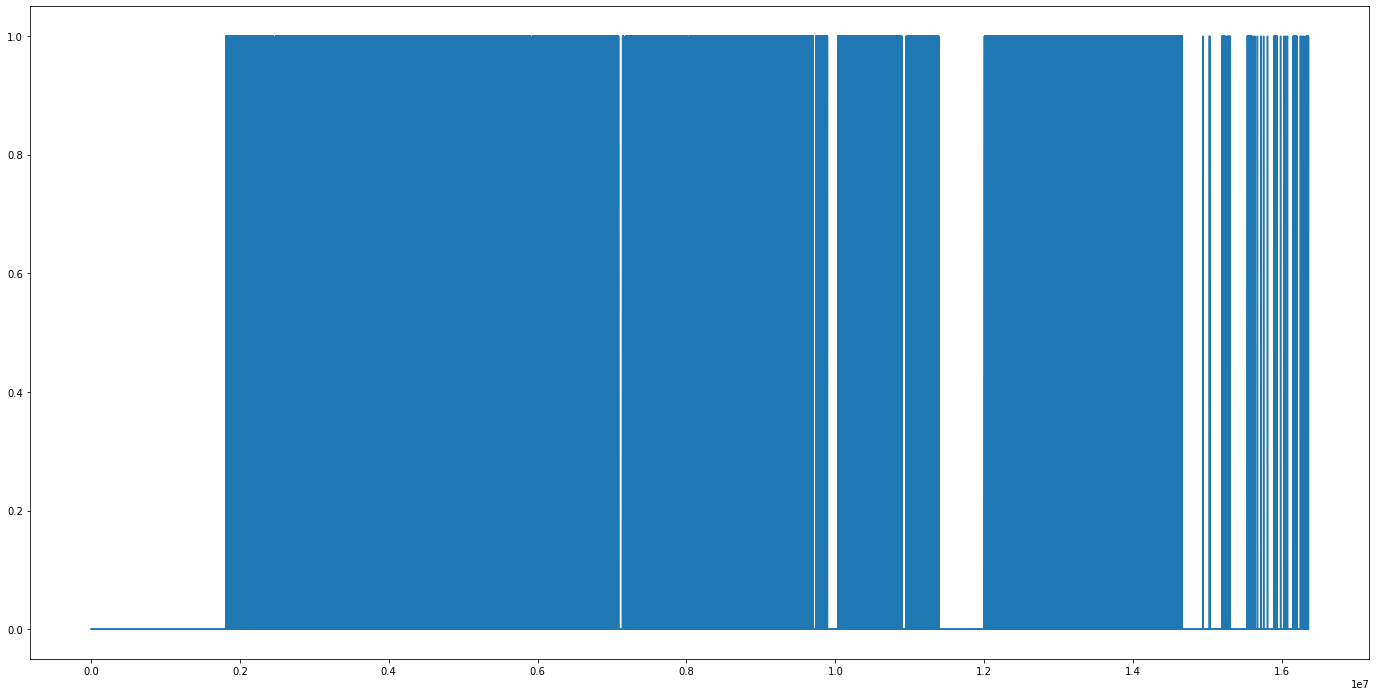

In [57]:
t_plot = np.zeros(max_t-min_t)
t98 = df[df['Station ID'] == 88]['Time since the epoch [s]'].values - min_t
t_plot[t98] = 1
plt.figure(figsize=(24,12))
plt.plot(t_plot)
plt.savefig('8_88_t.png',dpi=300,pad_inches=0)

In [55]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000